
# Project: Analysis of the movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The movies data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It is important to note that all references to figures/values in the budget_adj and revenue_adj columns are measured in US dollars. The values in other columns (popularity, vote_average, vote_count) do not have any SI unit of measurement.

**Questions**
 1. What are the characteristics of highly rated movies?
 2. What kinds of properties are associated with movies with high revenues?
 3. Which three movies have the highest profit?
 4. What are the top ten most rated movies?
 5. Is there a relationship between popularity,revenue and rating?
 6. What genre has the highest average popularity?

In [1]:
#loading essential packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
plt.style.use('seaborn-darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data set for the analysis will be loaded, checked for cleanliness, and then trimmed according to ensure best results.

### General Properties

In [2]:
#importing dataset for the analysis
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('movies_data.csv')

In [3]:
#viewing and inspecting data for properties and to determine necessary cleaning action
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [4]:
#checking for the number of duplicates in the data set.
sum(df.duplicated())

1

In [5]:
#Viewing the row with the duplicate data
new_duplicate= df[df.duplicated('id')]
print('duplicates in id:')
print(new_duplicate)

duplicates in id:
         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951       0.596  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year   budget_adj  \
2090      3/20/10        110         5.000          2010 30000000.000   

      revenue_adj  
2090   967000.000  

[1 rows x 21 columns]


In [6]:
#checking columns with null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Examining and confirming the number of unique values in the 'id' column
df.id.nunique()

10865

From the inspection, it is noted that:
-  Some columns have null values that need to be dropped and some data types need to be changed to the correct one to mirror the data in the column. 
-  It is also essential to rename some columns like the 'original_title' to 'title'. Since there is no second column with titles, it would make the data clearer to rename the 'original_title' to 'title'. 
-  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. It is necessary to change the pipe characters to comma.The lists in the genre column will be  expanded using the explode function. This will make easier to answer the question of genre with the average highest popularity.
-  Columns like 'imdb_id'(incomplete), 'keywords', 'homepage', etc, will not be needed for the analysis, therefore need to be removed. These columns will not be beneficial in providing answers to the posed questions. The budget and revenue will also be removed and the budget_adj and revenue_adj columns will be used for the analysis. This is because the budget and revenue adjusted columns are calculated in terms of 2010 dollars, accounting for inflation.
-  The 'id' column has one duplicate value that needs to be removed, this is because no two movies can have the same id, ids are unique to each movie.
-  Rows that have zero (0) recorded as the information for budget and revenue will be removed.Since they will not be beneficial in providing any information during the analysis.

### Data Cleaning

In [8]:
#Removing columns not needed for the analysis
df.drop(['imdb_id', 'homepage', 'budget', 'revenue', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

#confirm changes
df.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [9]:
#Renaming the columns
df.rename(columns = {'original_title':'title'}, inplace=True)

# confirm changes
df.head(1)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524


In [10]:
#Removes rows with values as zero
df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)

df['budget_adj'] = df['budget_adj'].replace(0, np.nan)

#confirms to check that zero values were actuall removed from the revenue_adj and budget_adj columns
df['revenue_adj'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
revenue_adj,4850.000,115077354.868,198841916.050,2.371,10462622.835,43927485.544,131564380.456,2827123750.412


In [11]:
#Removing null values
df.dropna(inplace=True)

In [12]:
#confirming that no column still has null values
df.isnull().sum().any()

False

In [13]:
#Removing duplicates
df.drop_duplicates(inplace=True)

#confirming that there are no more duplicates
sum(df.duplicated())

0

In [14]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')

#viewing new dataframe with split genres
genres_df.head(3)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524


In [15]:
# split cast string, at |, explode the list to rows
cast_df = df.assign(cast=df['cast'].str.split('|')).explode('cast')

#viewing new dataframe with split cast
cast_df.head(3)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
0,135397,32.986,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
0,135397,32.986,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524


In [16]:
# split production companies string, at |, explode the list to rows
prodcompanies_df = df.assign(production_companies=df['production_companies'].str.split('|')).explode('production_companies')

#viewing new dataframe with production copanies split
prodcompanies_df.head(3)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
0,135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6/9/15,5562,6.500,2015,137999939.280,1392445892.524


In [17]:
#changing data type
df['release_date'] = pd.to_datetime(df['release_date'])

df['runtime'] = pd.to_timedelta(df['runtime'], unit='m')
#confirming changes
df.dtypes

id                                int64
popularity                      float64
title                            object
cast                             object
director                         object
runtime                 timedelta64[ns]
genres                           object
production_companies             object
release_date             datetime64[ns]
vote_count                        int64
vote_average                    float64
release_year                      int64
budget_adj                      float64
revenue_adj                     float64
dtype: object

In [18]:
#creating new column for profit
df['profit'] = df['revenue_adj'] - df['budget_adj']

#confirming new column
df.columns

Index(['id', 'popularity', 'title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'profit'],
      dtype='object')

In [19]:
#setting index column
df.set_index('id', inplace=True)

In [20]:
#confirming that no zero values exist
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3805.000,3805,3805.000,3805.000,3805.000,3805.000,3805.000,3805.000
mean,1.204,0 days 01:49:21.067017082,534.159,6.171,2001.229,44719765.293,138715934.346,93996169.053
std,1.481,0 days 00:19:50.740660110,883.758,0.792,11.330,44886971.833,216997311.358,195033249.656
min,0.010,0 days 00:15:00,10.000,2.200,1960.000,0.969,2.371,-413912431.000
25%,0.471,0 days 01:36:00,74.000,5.700,1995.000,13546369.284,19253711.018,-1420000.000
50%,0.811,0 days 01:46:00,209.000,6.200,2004.000,30383599.014,62846878.294,28513340.200
75%,1.387,0 days 01:59:00,584.000,6.700,2010.000,60841527.993,165805400.340,109026621.437
max,32.986,0 days 05:38:00,9767.000,8.400,2015.000,425000000.000,2827123750.412,2750136650.919


In [21]:
#Confirming details of dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 135397 to 2161
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   popularity            3805 non-null   float64        
 1   title                 3805 non-null   object         
 2   cast                  3805 non-null   object         
 3   director              3805 non-null   object         
 4   runtime               3805 non-null   timedelta64[ns]
 5   genres                3805 non-null   object         
 6   production_companies  3805 non-null   object         
 7   release_date          3805 non-null   datetime64[ns] 
 8   vote_count            3805 non-null   int64          
 9   vote_average          3805 non-null   float64        
 10  release_year          3805 non-null   int64          
 11  budget_adj            3805 non-null   float64        
 12  revenue_adj           3805 non-null   float64        
 13

<a id='eda'></a>
## Exploratory Data Analysis



### Histogram for various movie properties.

In [22]:
#plotting a histogram for the budget adj
def myhist(df, xVar):
    
    # A simple function created to avoid code repetition. It is to be used in plotting histograms of various movie properties within this notebook.
    #inputs : variables to be plotted
    #outputs: scatter plots of dependent variables against independent variable.
    
    #Plots
    fig, axis = plt.subplots(figsize =(14, 7))
    plt.hist(data=df, x=xVar);
    
    #Formats chart titles and labels
    #Formats x-axis
    plt.xlabel(xVar.title(), fontsize=15)
    
    #Formats y-axis
    plt.ylabel('Frequency', fontsize=15)
    
    #Adds title to the top of histogram
    plt.title(f'Histogram of {xVar}'.title(), fontsize=18, weight="bold")

Text(0.5, 0, 'Budget Adj ($)')

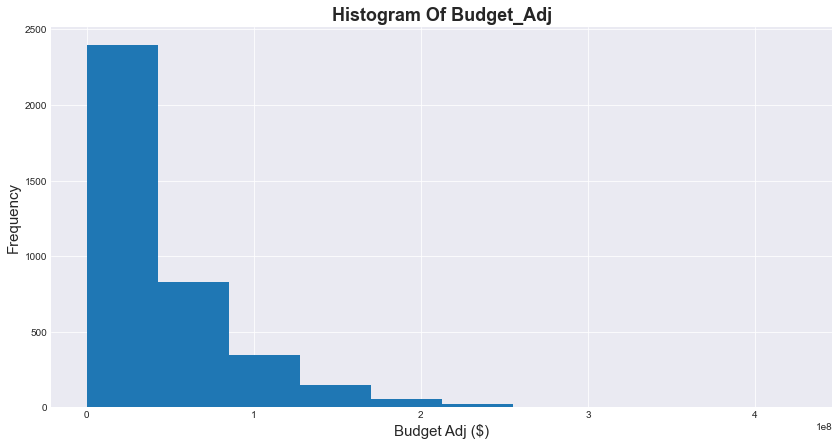

In [23]:
#Calls histogram function and creates histogram for budget adj

myhist(df, 'budget_adj')
plt.xlabel('Budget Adj ($)', fontsize=15)

> The histogram of budget adj is positively skewed. 

Text(0.5, 0, 'Revenue Adj ($)')

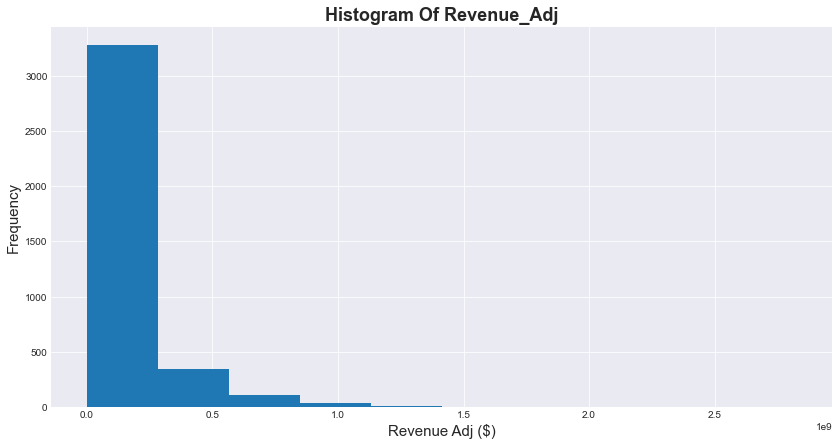

In [24]:
#Calls histogram function and creates histogram for revenue adj
myhist(df, 'revenue_adj')
plt.xlabel('Revenue Adj ($)', fontsize=15)

> The histogram of revenue adj is rightly skewed. 

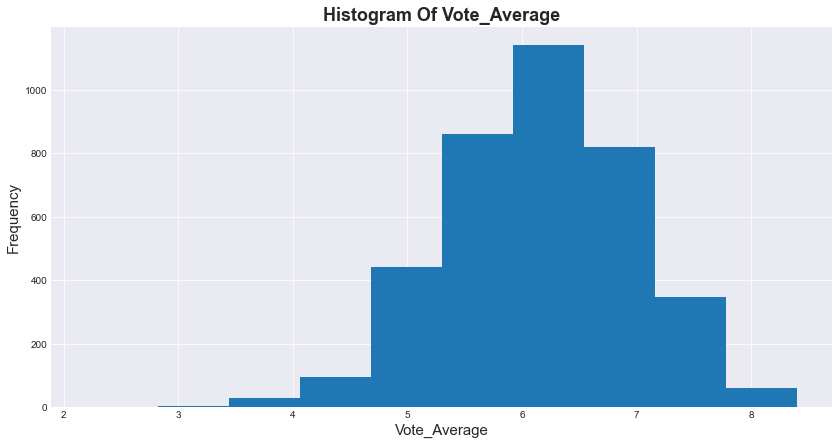

In [25]:
#Calls histogram function
myhist(df, 'vote_average')

> The vote_average histogram is skewed to the left (negative skew), implying that the mean is less than the median. It does appear to be moderately skewed to the left, however, a statistical test is required to determine the skewness value or number.

Text(0.5, 0, 'Profit ($)')

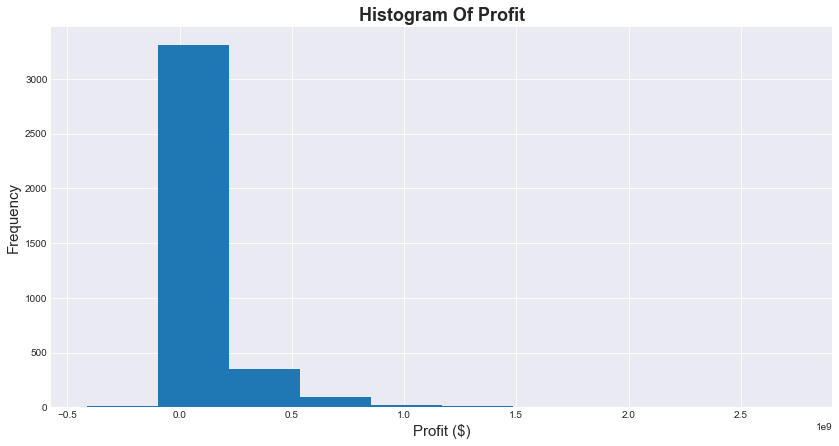

In [26]:
#Calls histogram function
myhist(df, 'profit')
plt.xlabel('Profit ($)', fontsize=15)

> The histogram of revenue adj is highly skewed to the right (positive skew). 

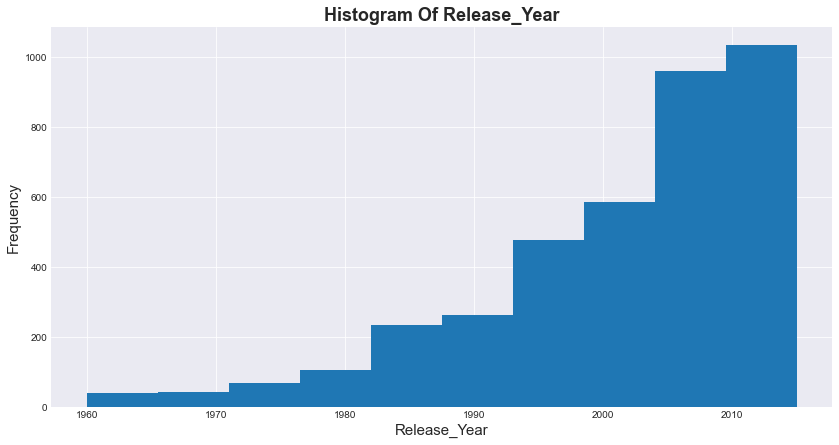

In [27]:
#Calls histogram function
myhist(df, 'release_year')

> The above histogram indicates that as majority of movies within the dataset were produced or released between 2005 to 2015. This graph is negatively skewed. 

### Question 1: What are the characteristics of highly rated movies?

**For movie ratings, the vote_average column will be used to represent ratings. Categories were generated based on the percentile values as:

- Poor = below 25th percentile
- Average = between 25th -50th
- Very Good = between 50th - 75th
- Excellent  = above the 75th

**Categories: Poor, Average, Very Good, Excellent.

In [28]:
#Creating categories
df.describe().vote_average.loc[['min', '25%', '50%', '75%', 'max']]

min   2.200
25%   5.700
50%   6.200
75%   6.700
max   8.400
Name: vote_average, dtype: float64

In [29]:
#Bin egdes that will be used for categorizing
bin_edges = df.describe().vote_average.loc[['min', '25%', '50%', '75%', 'max']].values

#labels for the four categories of rating
bin_names = ['poor', 'average', 'very_good', 'excellent']

In [30]:
#creates rating category column
df['rating_cat'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

#checking for successful creation of the rating_cat column
df.head(1)

,popularity,title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,rating_cat
id,,,,,,,,,,,,,,,
135397,32.986,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,0 days 02:04:00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.500,2015,137999939.280,1392445892.524,1254445953.244,very_good


In [31]:
df.rating_cat.unique

<bound method Series.unique of id
135397    very_good
76341     excellent
262500    very_good
140607    excellent
168259    excellent
            ...    
396       excellent
5780      very_good
6644      excellent
5923      excellent
2161      very_good
Name: rating_cat, Length: 3805, dtype: category
Categories (4, object): ['poor' < 'average' < 'very_good' < 'excellent']>

In [32]:
#Gets all highly rated movies, that is movies that are rated excellent.
df_highlyrated = df.query('rating_cat == "excellent"')

In [33]:
#Explores highly rated movies
df_highlyrated.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,891.000,891,891.000,891.000,891.000,891.000,891.000,891.000
mean,1.944,0 days 01:59:10.707070707,1083.451,7.181,1998.530,45275442.066,225124254.954,179848812.888
std,2.216,0 days 00:24:06.679209584,1376.075,0.323,13.891,48913624.695,326977566.202,298943272.507
min,0.018,0 days 00:15:00,10.000,6.800,1960.000,3.000,2.862,-118534968.140
25%,0.680,0 days 01:42:00,186.500,6.900,1990.000,12628236.627,34147655.261,12511419.738
50%,1.255,0 days 01:56:00,549.000,7.100,2002.000,28143759.025,102264882.236,67011247.109
75%,2.468,0 days 02:12:00,1414.000,7.400,2010.000,59645888.697,269366878.522,219599799.777
max,28.420,0 days 03:36:00,9767.000,8.400,2015.000,315500574.789,2827123750.412,2750136650.919


In [34]:
#Determine the average budget,revenue,popularity,and profit of the dataset where rating is not equals 'excellent' and compare it to the means of the same variables in the highly rated movies.
#This will help us know whether movies that are rated highly have mean budget, revenue, popularity and profit above the average in the dataset.

df_otherrating = df.query('rating_cat != "excellent"')

df_otherrating.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2914.000,2914,2914.000,2914.000,2914.000,2914.000,2914.000,2914.000
mean,0.977,0 days 01:46:20.775566231,366.205,5.862,2002.055,44549858.634,112295270.770,67745412.136
std,1.069,0 days 00:17:15.979886138,566.457,0.617,10.284,43589107.751,160758673.907,139372846.253
min,0.010,0 days 01:06:00,10.000,2.200,1961.000,0.969,2.371,-413912431.000
25%,0.438,0 days 01:35:00,61.000,5.500,1997.000,13820330.034,17032873.048,-3898591.373
50%,0.736,0 days 01:43:00,166.000,6.000,2005.000,31010368.681,54042496.039,19690945.206
75%,1.204,0 days 01:55:00,411.750,6.300,2010.000,61116055.007,139231766.912,85106433.643
max,32.986,0 days 05:38:00,7080.000,6.700,2015.000,425000000.000,1583049536.352,1551568265.276


> From the analysis of question one, it can be seen that there are 891 movies that have been rated excellent. It is safe to say that the characteristics of highly rated movies are budget of atleast 3.000 dollars; revenue of atleast 28,619,340 dollars; deficit of -118535000 dollars; and popularity of atleast 0.0177. 
> It can be concluded that the minimum budget for a highly rated movie is 3.000dollars which is most likely a data entry error because no movie producer can set out making a film with only 3.000 dollars allotted. Even though this is the case, this budget is higher than that found in other rating categories. However, the popularity of movies rated excellent is more than that of movies in the other rating categories.

### Question 2:  What kinds of properties are associated with movies with high revenues?

In [35]:
#High revenue means that the movie revenue exceeds the average revenue in the dataset.

#Gets the features of all movies with revenue greater the average revenue in the dataset.
df_toprevenue = df.query('revenue_adj > revenue_adj.mean()')

In [36]:
df_toprevenue.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1109.000,1109,1109.000,1109.000,1109.000,1109.000,1109.000,1109.000
mean,2.136,0 days 01:56:38.845807033,1201.192,6.432,1999.752,82663310.410,369613234.515,286949924.104
std,2.219,0 days 00:22:27.890222873,1297.990,0.720,12.445,55141690.414,287800554.701,273218729.804
min,0.132,0 days 01:09:00,13.000,4.100,1960.000,224.803,138781054.170,-22499925.117
25%,1.012,0 days 01:40:00,332.000,5.900,1994.000,39720012.163,188297310.747,127593303.658
50%,1.588,0 days 01:54:00,728.000,6.400,2003.000,73010601.514,269859485.334,196672765.406
75%,2.523,0 days 02:10:00,1611.000,7.000,2010.000,113969313.762,440959531.357,353945311.979
max,32.986,0 days 04:08:00,9767.000,8.300,2015.000,368371256.185,2827123750.412,2750136650.919


> Movies that have high revenues have a minimum budget of 224.80 dollars and maximum profit of 2,750,137,000. These high grossing movies also have a mean rating of 6.432

### Question 3: Which three movies have the highest all time profit?

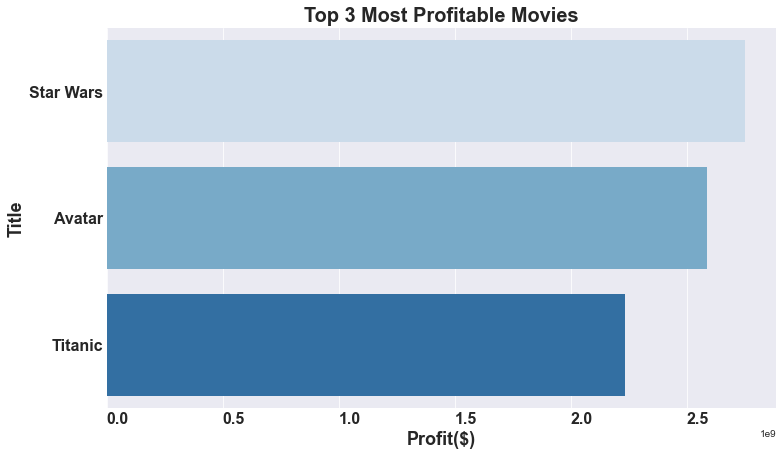

In [37]:
# Plotting bar chart for the three most profitable movies.

#Assigning data for plotting
cols = ['title', 'profit']
profit_df = df.sort_values('profit', ascending=False)[cols].set_index('title')
top_3 = profit_df.head(3)

#Plotting bar chart showing the top three movies with the highest profit
fig, ax = plt.subplots(figsize=(12, 7))
sb.barplot(data=top_3, y=top_3.index, x='profit', palette= 'Blues');

plt.xticks(ha='left', rotation=0, fontsize=16, weight='bold'); 
plt.yticks(fontsize=16, weight='bold')

#Setting labels/titles for axis
plt.xlabel('Profit($)', fontsize = 18, weight = "bold")
plt.ylabel('Title', fontsize = 18, weight = "bold")

#Adding title of chart
plt.title('Top 3 Most Profitable Movies', fontsize=20, weight='bold');

In [38]:
# checking the release year of the three most profitable movies
sort_df=df.sort_values('profit', ascending=False).set_index('title')
sort_df[['release_year', 'profit']].head(3)

,release_year,profit
title,,
Star Wars,1977,2750136650.919
Avatar,2009,2586236847.524
Titanic,1997,2234713671.205


> The top 3 movies with the highest profit are Star Wars, Avatar and Titanic. The Interesting observation to note is the year in which these movies were released. The latest movie in the dataset was released in the year 2015, yet none of them have made profits to surpass 'Star Wars' produced more than a decade before.

### Question 4: What are the top ten most rated movies?

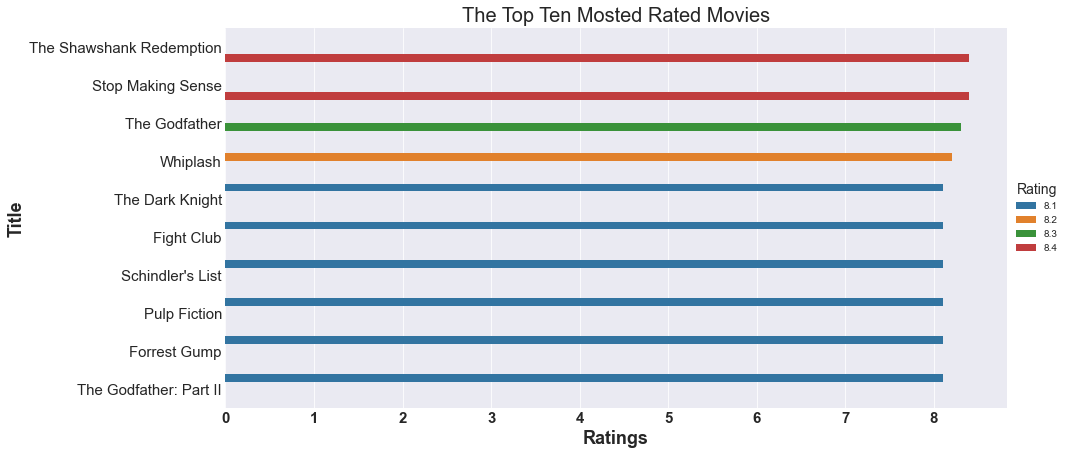

In [39]:
# Plotting bar chart for the top ten highly rated movies.

#Assigning data for plotting
cols = ['title', 'vote_average']
rating_df = df.sort_values('vote_average', ascending=False)[cols].set_index('title')
top_10= rating_df.head(10)

#Plotting bar chart showing the top three movies with the highest profit
fig, ax = plt.subplots(figsize=(14, 7))
sb.barplot(data=top_10, y=top_10.index, x='vote_average', hue='vote_average');

plt.xticks(ha='center', rotation=0, fontsize=15, weight="bold");
plt.yticks(fontsize=15)

#Setting labels/titles for axis
plt.xlabel('Ratings', fontsize = 18, weight = "bold")
plt.ylabel('Title', fontsize = 18, weight = "bold")

#Adding title of chart and legend for rating values
plt.title('The Top Ten Mosted Rated Movies', fontsize=20);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Rating", title_fontsize = 14);

> The top ten most rated movies can be seen in the above bar graph. The top ten highly rated movies are not necessarily the ones with the highest profit. There are two movies with the highest rating in the dataset, namely; 'The Shawshank Redemption' and 'Stop Making Sense'.

### Research Question 5: Is there a relationship between popularity, revenue and rating?

In [40]:
#plotting scatterplots of popularity against the other variables

def myScatterPlot(df, xVar, yVar):
    
    # A simple function created to avoid code repetition. It is to be used in plotting scatter plots within this notebook.
    #inputs : variables to be plotted
    #outputs: scatter plots of dependent variables against independent variable.
    
    # Plots
    df.plot(kind= 'scatter', x= xVar, y= yVar, figsize=[14,6], color=['g']);
    
    # OPTIONAL: After plotting, tidy up labels
    xVar=xVar.replace("-"," ") #replace _ with a space
    yVar=yVar.replace("-"," ") #replace _ with a space
    
    # Add title and format it
    plt.title(f'Relationship between {yVar} and {xVar}'.title(), fontsize =14, weight = "bold")
    
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 12, weight = "bold")
    
    # Add y label and format it
    plt.ylabel(yVar.title(), fontsize = 12, weight = "bold")

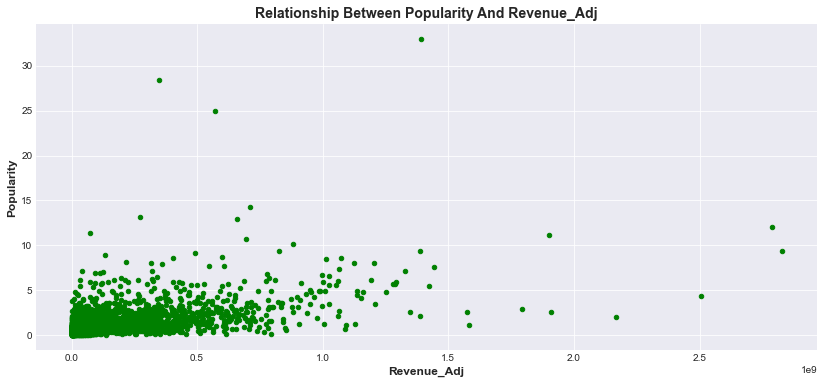

In [41]:
# call plot function
myScatterPlot(df, 'revenue_adj','popularity')

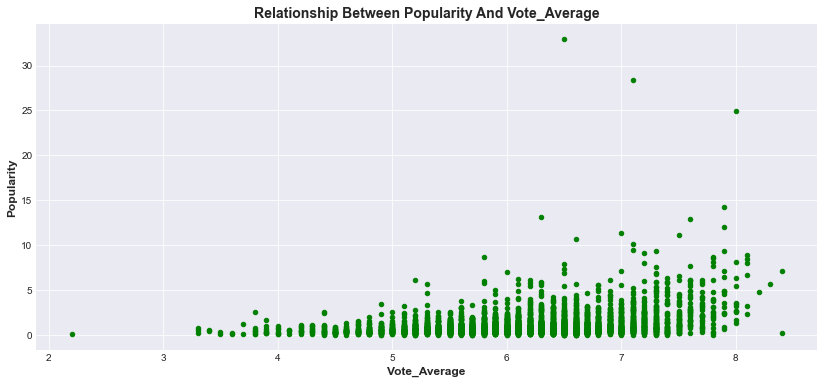

In [42]:
myScatterPlot(df, 'vote_average','popularity')

In [43]:
df.corr().popularity.to_frame().T

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000,0.779,0.320,0.176,0.395,0.545,0.515


> Scatterplots are good plots for comparing the relationship between variables. Given that, popularity may influence the rush to watch a film and possibly rate it higher. My hypothesis was that the higher the popularity of a movie, the greater its viewer rating and revenue. The above visuals do not affirm my hypothesis. It can be seen that there is a somewhat strong positive relationship between popularity and revenue, while there is a weak positive relationship between popularity and rating/vote_average. The dots on the plot indicate that the most highly rated movies were not very popular.

In [44]:
# Using the group exploded dataframe by genres to get average popularity
genres_df.groupby('genres').popularity.mean().to_frame().T

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
popularity,1.578,1.881,1.724,1.025,1.127,0.354,1.013,1.482,1.758,0.192,0.974,0.858,0.924,1.145,0.965,1.879,0.274,1.267,1.246,1.134


Text(0, 0.5, 'Genres')

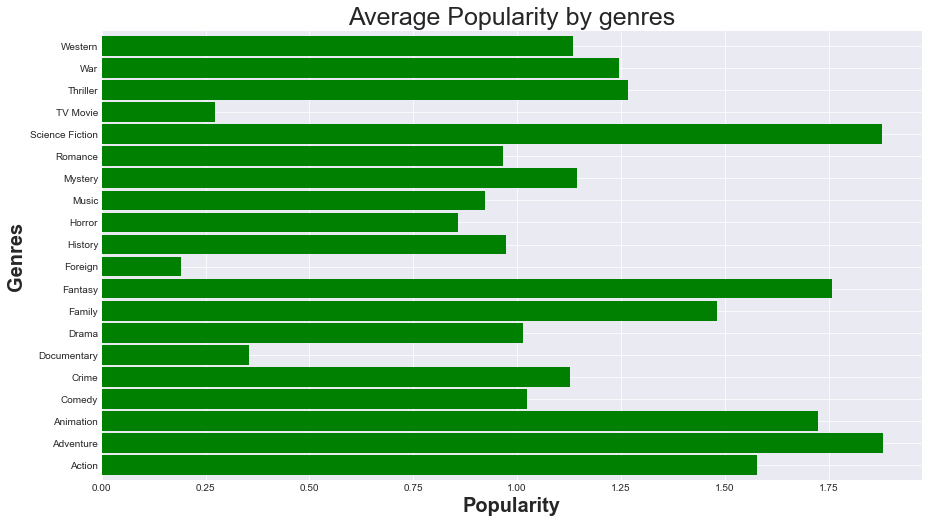

In [45]:
# Creates a chart for average popularity by genre.
genres_df.groupby('genres').popularity.mean().plot.barh(color=['g'],width=0.9,figsize=[14.70, 8.27],rot=0)

# Adding titles/labels to chart
plt.title('Average Popularity by genres', fontsize = 25)
plt.xlabel('Popularity', fontsize = 20, weight = "bold")
plt.ylabel('Genres', fontsize = 20, weight = "bold")

> The bar graph above indicates that the genre with the highest average popularity is 'Adventures' with an average popularity score of 1.154. 

<a id='conclusions'></a>
## Conclusions

>The steps for the analysis of this data were done using histograms to present separate variables of interest; using scatter plots to check for relationships between the stated independent and dependent variables; and finally, the use of bar charts to present information on two variables of interest. All conclusions drawn were based on the movie dataset that was available.

>Assertions reached from available data and questions posed reveal that the answer to the first question about the characteristics of highly rated movies does not exactly have any outstanding features that other movies with lower ratings do not have, except that they are more popular and that the raters probably enjoyed them more than the ones rated lower.

>In terms of the properties connected with high-grossing films, it can be stated that they have a high budgetary allocation and are very popular. Concerning the relationship between popularity, rating, and revenue, this can be described as weak. To find out exactly how much one might affect the other, more statistical analysis will need to be done.

>The bar graphs clearly display the top three most profitable movies, the top ten rated movies, and the most popular genre, using the average popularity as a measure. The popularity ratio between the adventure genre and the science fiction genre was quite close. None of the three most profitable movies appeared among the top-rated movies. A different analysis might need to be carried out to determine whether there is a reason for this.

> The results of this data analyis is limited by the data found within the dataset. Certain missing and inconsistent observations posed a major challenge. A different sample might yield different results. Other limitations are no statistical inference were performed in this analysis and therefore cannot be used to draw further conclusions. More information might be yielded if a different approach to data analysis  is followed.

## References- N/A